In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
################################################
# Read frames which have been data-cleaned (wire_particle_tracking_datacleaning). 
################################################
picL = 18333
FrameL = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picL))
picR = 18158
FrameR = pims.ImageSequence('/Users/pinghanchu/Documents/Git/Data/Clean_Data_Shot119_Cam_{}/frame_sum_*.tif'.format(picR))
BR = [[5.7149E-08,1.1882E-05,-2.4321E-03],[8.8831E-06,-5.3566E-07,-3.8744E-02],[-1.6469E-03,3.3774E-02,9.9867E-01]]
TR = [[-5.7704E-08,1.1998E-05,-2.1514E-03],[8.9694E-06,5.4087E-07,-3.9328E-02],[-1.7813E-03,3.3894E-02,9.9865E-01]]
TL = [[1.1040E-07,2.2954E-05,-4.1584E-03],[1.7160E-05,-1.0348E-06,6.8654E-02],[-3.4505E-03,-7.3661E-02,9.9490E-01]]
BL = [[-1.0175E-07,2.1155E-05,-4.2910E-03],[1.5815E-05,9.5369E-07,6.2907E-02],[-2.8931E-03,-6.8254E-02,9.9567E-01]]
#F = [[-0.00015066194509767998, 0.00026733118966930288, -0.0085524942869451871], [-0.00012934535260407222, 1.8829056626364587e-05, 0.59598872704287387], [0.03575794184799453, -0.61417151196474773, -0.51598343414811065]]
#F = [[-2.2711090096675569e-07, -3.2863623679017197e-05, 0.0047653621323426711],[3.3830923680777616e-05, 1.503158983917272e-05, -0.0020668460517759618], [-0.0046475660440331102, -0.0073107072788700048, 0.99994898405345922]]
F = [[  2.38372043e-07,   1.77806275e-05,  -3.52053479e-03], [  2.09971077e-05,   8.08182242e-07,  -5.65816030e-02],[ -3.69345369e-03,   5.08947576e-02,   9.97086861e-01]]
Matr = F
#normal = np.max(Matr)
MatrixL = np.array(Matr)
MatrixR = MatrixL.transpose()
Linex = np.arange(0,384,1)
frameIndex = 30

In [5]:
###################################
#Locate Features; single frame test
###################################
print(np.max(FrameL[frameIndex]))
fL = tp.locate(FrameL[frameIndex], 3, minmass=10) 
fL.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,245.082456,17.017544,150.799061,0.847080,0.366748,42.594121,375.0,0.000095,30
1,217.153285,19.120438,144.978746,0.852219,0.371859,39.683963,329.0,0.000108,30
2,227.972158,18.839907,114.025255,0.846722,0.313916,32.276290,288.0,0.000123,30
3,224.943445,25.961440,102.913745,0.837735,0.450549,30.688932,269.0,0.000132,30
4,216.066815,27.126949,118.787330,0.845531,0.345794,33.863649,296.0,0.000120,30


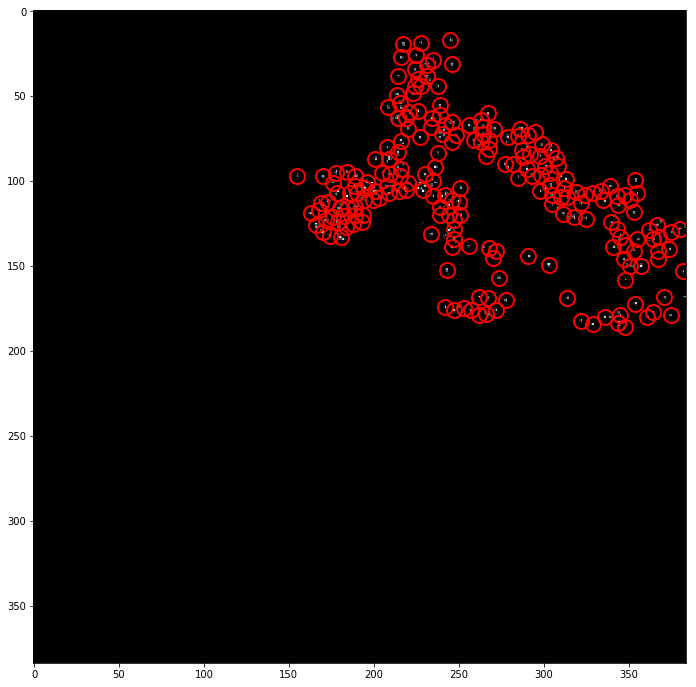

In [6]:
#Show points located. It will be better to have more points rather than missing points.
plt.figure(figsize = (12,12))  # make a new figure
#plt.plot(ipL[0], ipL[1],'o')
tp.annotate(fL, FrameL[frameIndex]);

In [7]:
print(np.max(FrameR[frameIndex]))
fR = tp.locate(FrameR[frameIndex], 3, minmass=10) 
fR.head() 

255


,x,y,mass,size,ecc,signal,raw_mass,ep,frame
0,234.976577,5.996396,144.071562,0.845763,0.350126,41.014967,362.0,0.000329,30
1,210.967532,9.876623,119.929841,0.845154,0.339394,34.265669,300.0,0.000397,30
2,204.941278,11.139896,150.301683,0.848650,0.309353,42.053321,384.0,0.000311,30
3,198.857605,18.029126,80.212815,0.838013,0.493088,23.882133,208.0,0.000573,30
4,214.905830,19.959641,115.776426,0.862783,0.126506,29.593078,287.0,0.000415,30


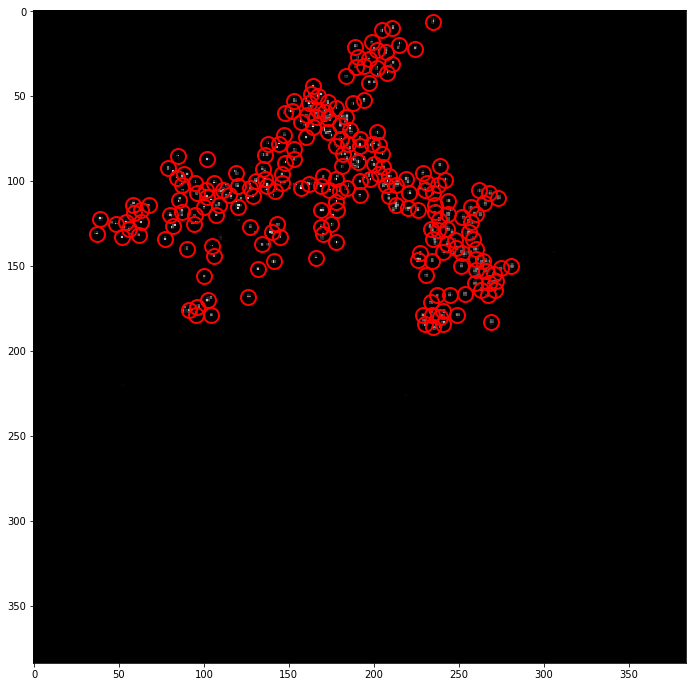

218


In [8]:
plt.figure(figsize = (12,12))  # make a new figure
#plt.plot(ipR[0], ipR[1],'o')
tp.annotate(fR, FrameR[frameIndex]);
print(len(fR))

/Users/pinghanchu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


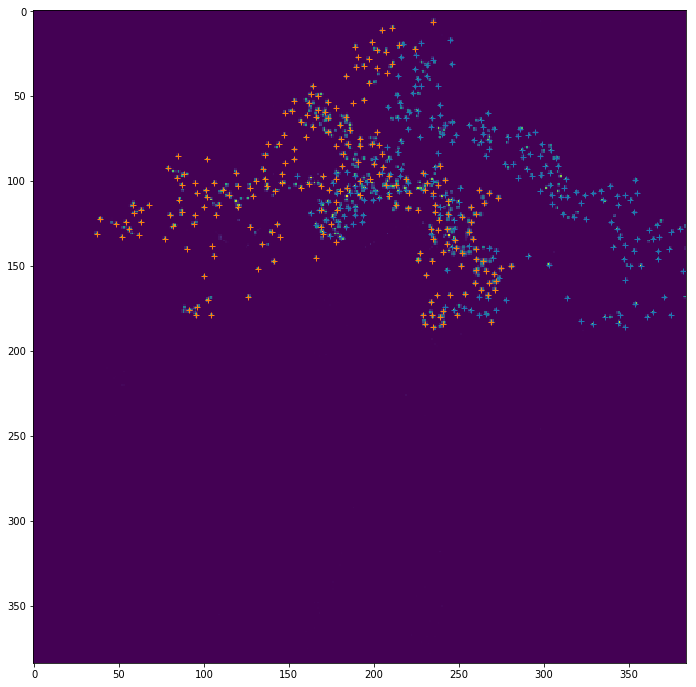

In [9]:
plt.figure(figsize = (12,12))
T0 = (fL['x'].iloc[0],fL['y'].iloc[0])
T1 = (fR['x'].iloc[0],fR['y'].iloc[0])

theta = math.pi*20./180.
fLx = np.array(fL['x']-T0[0])
fLy = np.array(fL['y']-T0[1])
fLr = np.sqrt(np.power(fLx,2)+np.power(fLy,2))
fLtheta = np.arccos(fLx/fLr)
fLtheta_rot = fLtheta + theta
fLx_rot = fLr*np.cos(fLtheta_rot)*1.
fLy_rot = fLr*np.sin(fLtheta_rot)*1.
#print(fLr, fLr, fLtheta_rot,fLx_rot)
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
plt.plot(fL['x'],fL['y'],'+')
plt.plot(fR['x'],fR['y'],'+')
#plt.plot(fL['x']-T0[0],fL['y']-T0[1],'o')
#plt.plot(fLx_rot+T1[0],fLy_rot+T1[1],'+')
plt.show()


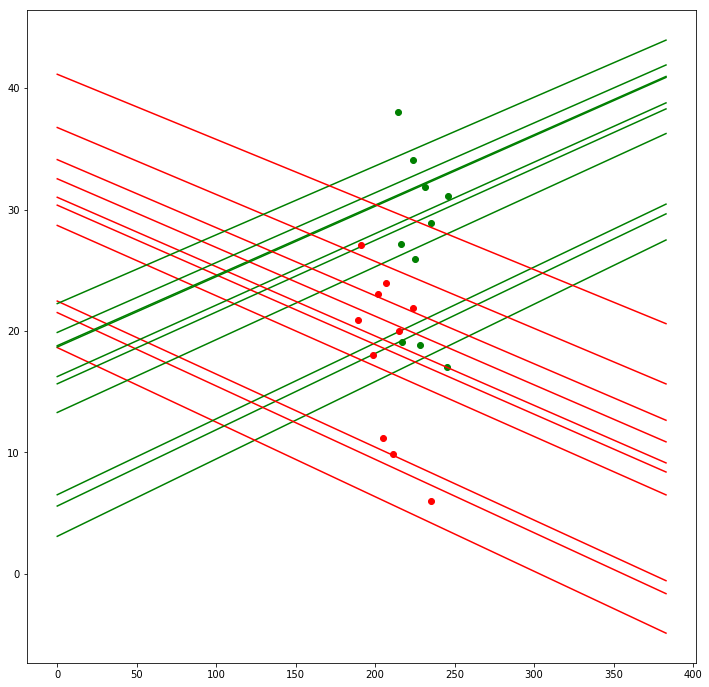

In [10]:
plt.figure(figsize=(12,12))
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
#for ii in range(230,len(fL)):
for ii in range(0,10):
    xL = fL['x'].iloc[ii]
    yL = fL['y'].iloc[ii]
    xR = fR['x'].iloc[ii]
    yR = fR['y'].iloc[ii]   
    ipL_i = [xL,yL,1]
    ipR_i = [xR,yR,1]
    LineR = np.dot(ipL_i,MatrixR) 
    LineL = np.dot(ipR_i,MatrixL) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyL,color='g')
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyR,color='r')
    dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
    #FF = dlr + drl
    #print(ii,xL,yL,xR,yR,dlr,drl)
plt.show()

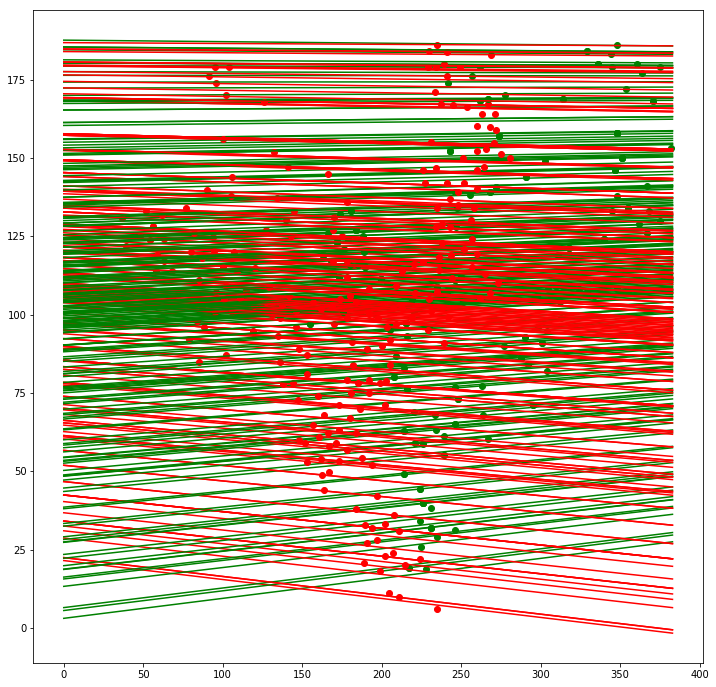

In [11]:
plt.figure(figsize=(12,12))
pairR = []
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
for ir in range(0,len(fR)):
#for ir in range(1,3):
    Min = 10000
    MinIndex = 0
    xR = fR['x'].iloc[ir]
    yR = fR['y'].iloc[ir]
    ipR_i = [xR,yR,1]
    LineL = np.dot(ipR_i,MatrixL)
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyL,color='g')
    #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    for il in range(0,len(fL)):
    #for il in range(0,10):
        xL = fL['x'].iloc[il]
        yL = fL['y'].iloc[il]
        ipL_i = [xL,yL,1]
        LineR = np.dot(ipL_i,MatrixR) 
        #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
        #plt.plot(xL,yL,'o',color='g')
        #plt.plot(Linex,LineyL,color='g')
        #plt.plot(xR,yR,'o',color='r')
        #plt.plot(Linex,LineyR,color='r')
        dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl
        #plt.plot(xL,yL,'o',color='g')
        #print(ir,xR,yR,il,xL,yL,dlr,drl)        
        if(FF<Min):
            Min = FF
            MinIndex = il
    xL = fL['x'].iloc[MinIndex]
    yL = fL['y'].iloc[MinIndex] 
    ipL_i = [xL,yL,1]
    LineR = np.dot(ipL_i,MatrixR) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1] 
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyR,color='r')
    ipair = [ir,MinIndex,Min]
    #print(ipair)
    pairR.append(ipair)
plt.show()


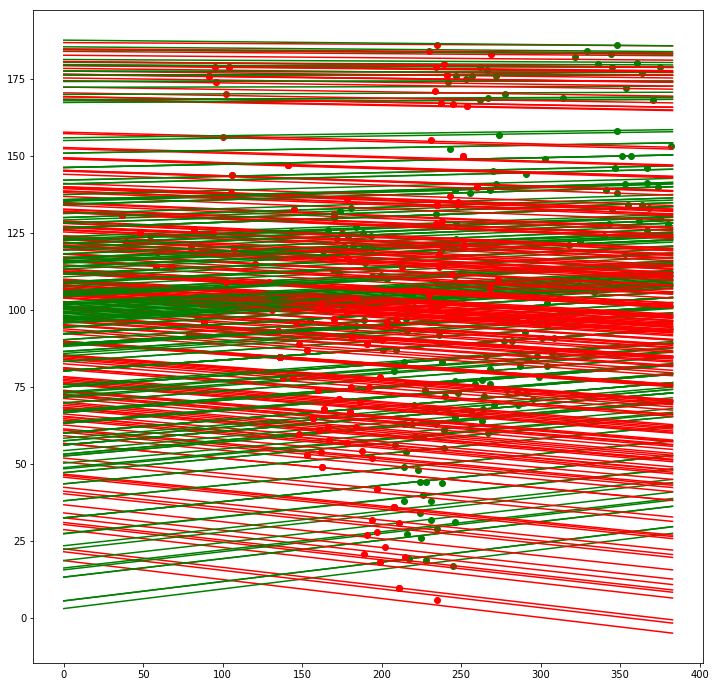

In [12]:
plt.figure(figsize=(12,12))
pairL = []
#plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
for il in range(0,len(fL)):
#for il in range(10,13):
    Min = 10000
    MinIndex = 0
    xL = fL['x'].iloc[il]
    yL = fL['y'].iloc[il]
    ipL_i = [xL,yL,1]
    LineR = np.dot(ipL_i,MatrixR)
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    plt.plot(xL,yL,'o',color='g')
    plt.plot(Linex,LineyR,color='r')
    #LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    for ir in range(0,len(fR)):
        xR = fR['x'].iloc[ir]
        yR = fR['y'].iloc[ir]
        ipR_i = [xR,yR,1]
        LineL = np.dot(ipR_i,MatrixL) 
        LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
        dlr = math.fabs(np.dot(ipL_i,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
        drl = math.fabs(np.dot(ipR_i,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])
        FF = dlr + drl     
        if(FF<Min):
            Min = FF
            MinIndex = ir
    xR = fR['x'].iloc[MinIndex]
    yR = fR['y'].iloc[MinIndex] 
    ipR_i = [xR,yR,1]
    LineL = np.dot(ipR_i,MatrixL) 
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1] 
    plt.plot(xR,yR,'o',color='r')
    plt.plot(Linex,LineyL,color='g')
    ipair = [MinIndex,il,Min]
    pairL.append(ipair)
plt.show()

In [13]:
#for ir in range(len(pairR)):
    #print(pairR[ir])

In [14]:
#for i1 in range(len(pairL)):
    #print(pairL[i1])

In [15]:
pair=[]
for ir in range(len(pairR)):
    for il in range(len(pairL)):
        RR = pairR[ir][0]
        RL = pairR[ir][1]
        LR = pairL[il][0]
        LL = pairL[il][1]
        if(RR == LR and RL == LL):
            ipair = [RR,RL]
            pair.append(ipair)
#for ii in range(len(pair)):
    #print(pair[ii])            

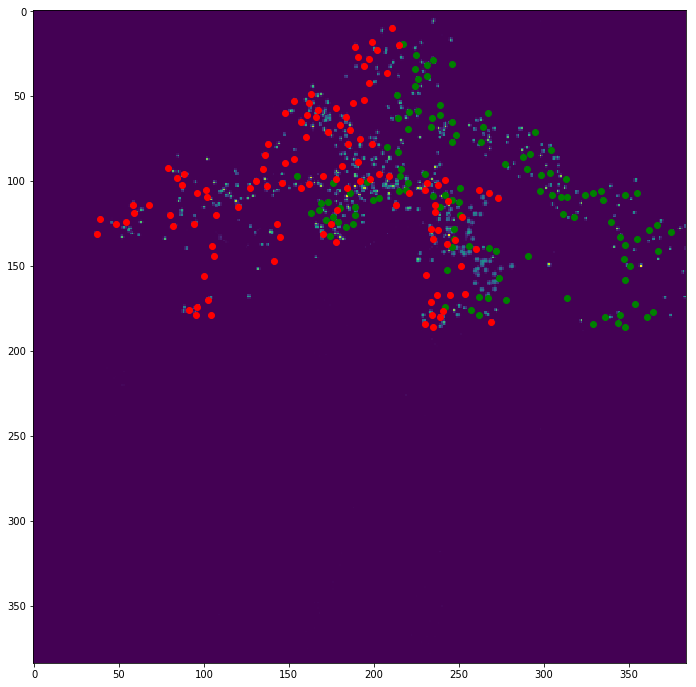

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
Data = []
for i in range(len(pair)):
    ir = pair[i][0]
    il = pair[i][1]
    xR = fR['x'].iloc[ir]
    yR = fR['y'].iloc[ir]
    xL = fL['x'].iloc[il]
    yL = fL['y'].iloc[il]
    massR = fR['mass'].iloc[ir]
    massL = fL['mass'].iloc[il]
    idata = [ir,il,massR,xR,yR,massL,xL,yL]
    Data.append(idata)
    #df = pd.DataFrame(data)
    ipR = [xR,yR,1]
    ipL = [xL,yL,1]
    LineR = np.dot(ipL,MatrixR) 
    LineL = np.dot(ipR,MatrixL) 
    LineyR = (-LineR[2]-LineR[0]*Linex)/LineR[1]
    LineyL = (-LineL[2]-LineL[0]*Linex)/LineL[1]
    #plt.figure(figsize=(12,12))
    #plt.imshow(FrameL[frameIndex]+FrameR[frameIndex])
    #plt.plot(Linex,LineyR,color='r')
    #plt.plot(Linex,LineyL,color='g')    
    plt.plot(xR,yR,'o',color='r')
    plt.plot(xL,yL,'o',color='g')
    #plt.savefig("frame_{}_track_{}.tif".format(frameIndex, i))
plt.show()

In [17]:
df = pd.DataFrame(Data)
df.columns = ['PID_R','PID_L', 'Mass_R','X_R','Y_R','Mass_L','X_L','Y_L']
df.head()

,PID_R,PID_L,Mass_R,X_R,Y_R,Mass_L,X_L,Y_L
0,1,1,119.929841,210.967532,9.876623,144.978746,217.153285,19.120438
1,3,3,80.212815,198.857605,18.029126,102.913745,224.943445,25.961440
2,4,6,115.776426,214.905830,19.959641,134.925475,245.941176,31.113725
3,5,5,123.304490,189.084211,20.863158,90.479436,235.137427,28.929825
4,7,7,93.971001,201.988950,23.044199,138.629312,231.127863,31.841603


In [61]:
df.to_csv("PointPair_Frame_{}.csv".format(frameIndex))